# Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [101]:
from email.quoprimime import header_check

from matplotlib.pyplot import annotate
from sklearn.model_selection import train_test_split
# Installing the libraries with the specified version.
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost -q


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


#### Project Dependencies
- Python Version: 3.13
- numpy==2.3.2
- pandas==2.3.1
- scikit-learn==1.5.2
- matplotlib==3.10.6
- seaborn==0.13.2
- xgboost==3.0.5

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Import Dataset

In [103]:
df_original = pd.read_csv('data/EasyVisa.csv')
df_copy = df_original.copy()
df_clean = df_original.copy()
RANDOM_STATE=42

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [104]:
df_original.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [105]:
df_original.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [106]:
df_original.shape

(25480, 12)

#### Observations
This dataset has 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [107]:
df_original.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

9 object columns:
- case_id
- continent
- education_of_employee
- has_job_experience
- requires_job_training
- region_of_employment
- unit_of_wage
- full_time_position
- case_status

3 numerical columns:
- no_of_employees
- yr_of_estab
- prevailing_wage

In [108]:
col_numerical = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
col_id = ['case_id']
col_y = ['case_status']
col_binary = ['has_job_experience', 'requires_job_training', 'full_time_position']
col_categorical = ['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']

# Exploratory Data Analysis (EDA)

In [109]:
df_clean[col_categorical] = df_copy[col_categorical].astype('category')
df_clean[col_binary] = df_copy[col_binary].astype('category')
df_clean[col_id]= df_copy[col_id].astype('category')
df_clean[col_y]= df_copy[col_y].astype('category')

#### Fixing the negative values in number of employees columns

In [110]:
df_clean[df_clean['no_of_employees'] < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [111]:
df_clean['no_of_employees'] = np.abs(df_original['no_of_employees'])

#### Let's check the count of each unique category in each of the categorical variables

In [112]:
df_clean['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [113]:
df_clean['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

In [114]:
df_clean['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

In [115]:
df_clean['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

### Check for null values

In [116]:
df_clean.isnull().sum()


case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

#### Observation

The no_of_employees values has several empty values. I replaced the null values with the median no_of_employees.

In [117]:
# Use median value for missing no_of_employees values
df_clean['no_of_employees'] = df_clean['no_of_employees'].fillna(df_clean['no_of_employees'].median())
df_clean.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Check for duplicate values

In [118]:
df_duplicates = df_clean.duplicated(keep=False)
df_duplicates.sum()

np.int64(0)

#### Observation

No Duplicates were found

### Helper Methods

In [119]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [120]:

# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

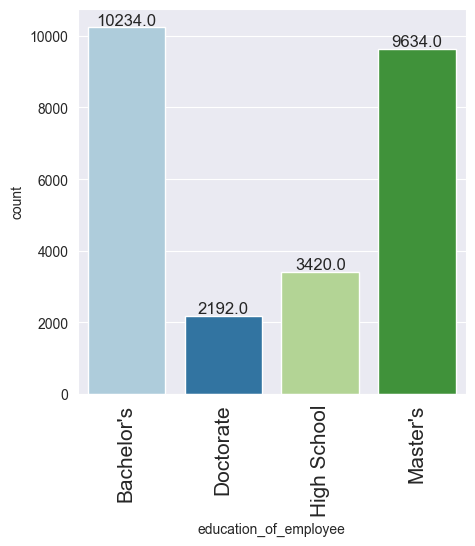

In [121]:
labeled_barplot(data=df_clean, feature='education_of_employee')

#### Observation
- Most of the individuals in this dataset either have a Bachelor's or Master's degree.

#### Observations on region of employment

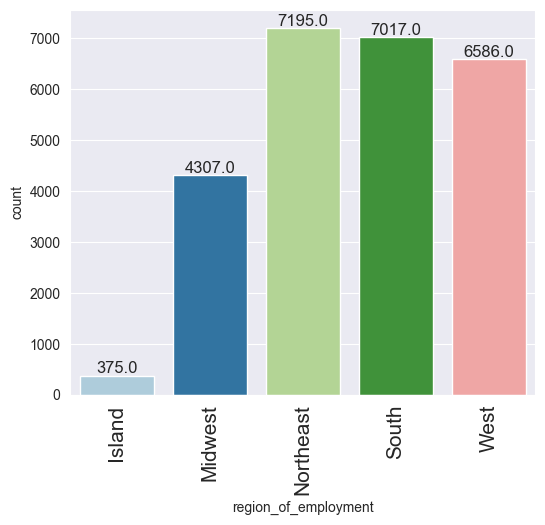

In [122]:
labeled_barplot(data=df_clean, feature='region_of_employment')

#### Observations
- Only 375 individuals have Island listed as their employment region
- The top 3 regions in this dataset are 'Northeast', 'South', and 'West'

#### Observations on job experience

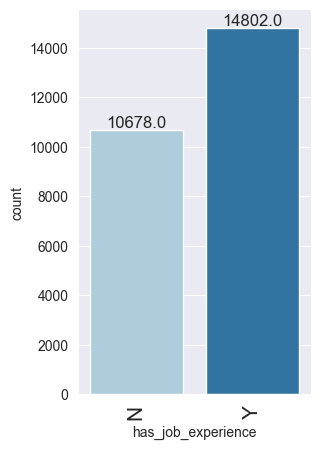

In [123]:
labeled_barplot(data=df_copy, feature='has_job_experience')

#### Observations on case status

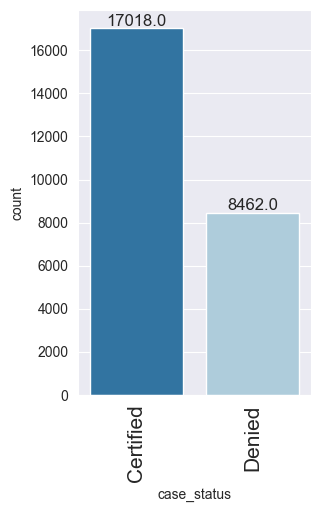

In [124]:
labeled_barplot(data=df_copy, feature='case_status')

#### Observations
- 17,018 of the cases in this dataset were certified
- 8,462 of the cases in this dataset were denied

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [125]:
### function to plot distributions wrt target
def distribution_of_target(data, predictor, target):
    fig, axs = plt.subplots(1, 2, figsize=(14, 8))

    target_uniq = data[target].unique()

    axs[0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0],
        color="teal",
        stat="density",
    )

    axs[1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[1],
        color="orange",
        stat="density",
    )

def wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 1, figsize=(12, 10))
    # Add hue here
    axs[0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[0], palette="gist_rainbow", hue=predictor)

    axs[1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1],
        showfliers=False,
        palette="gist_rainbow",
        hue=predictor,
    )

    plt.tight_layout()
    plt.show()

In [126]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


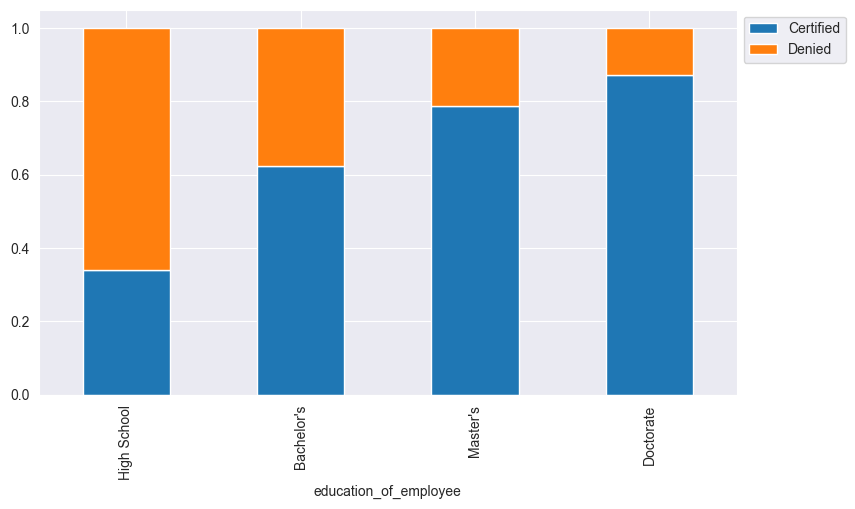

In [127]:
stacked_barplot(data=df_clean, predictor='education_of_employee', target='case_status')

#### Observations
- As education level goes up the likelihood of certification also goes up.
- Individuals with a Master's or Doctorate degrees were most likely to get certified.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


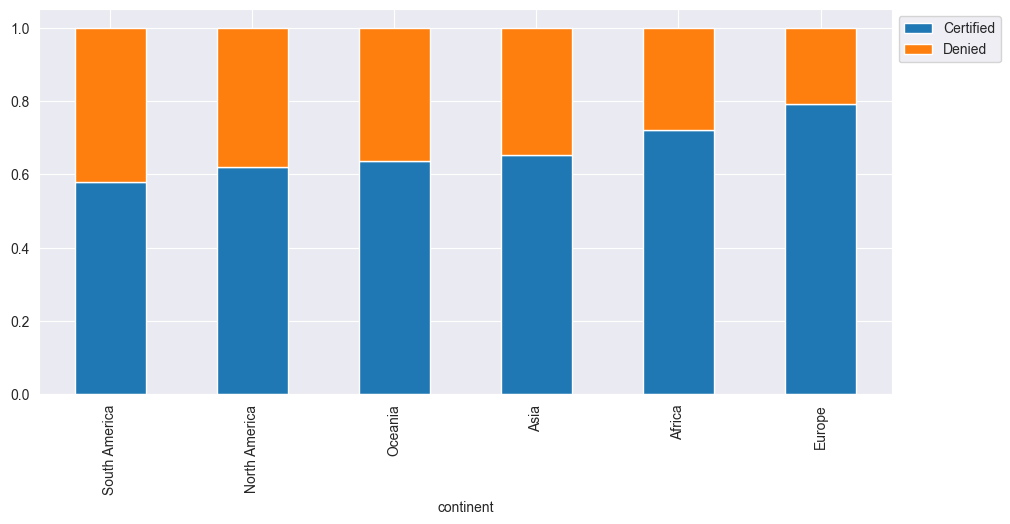

In [128]:
stacked_barplot(data=df_clean, predictor='continent', target='case_status')

#### Observations
- There were more applicants from Asia than any other continent.
- The effect the continent has on certification chance is fairly small
- Individuals from Europe were most likely to get certified

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


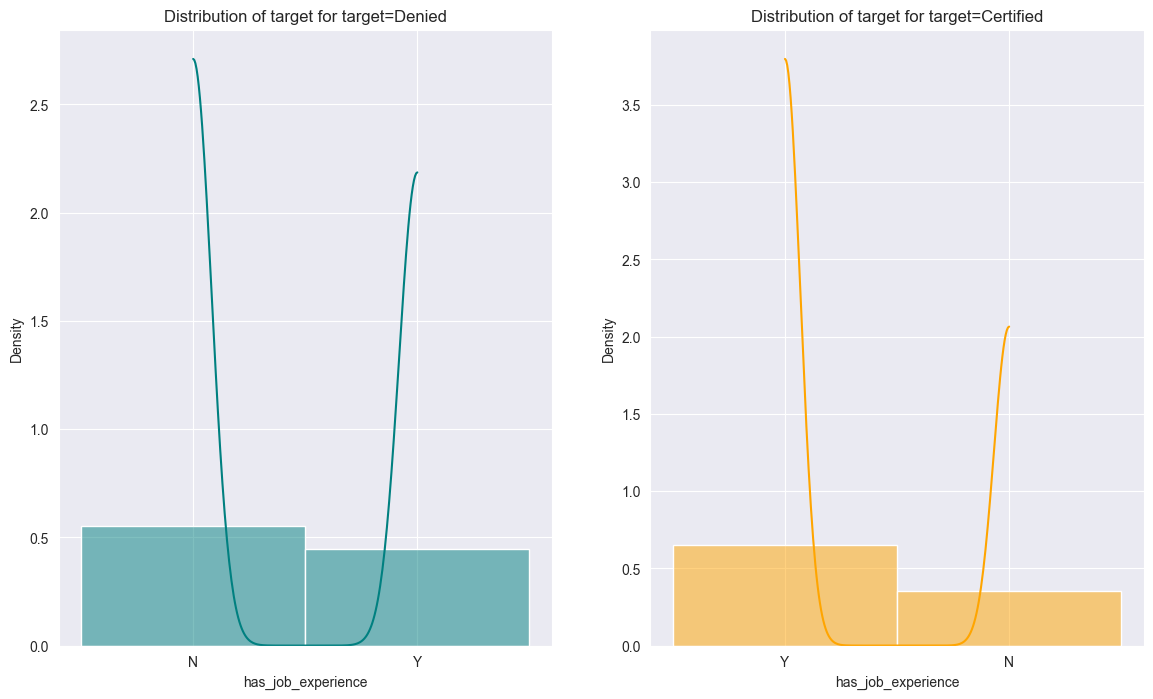

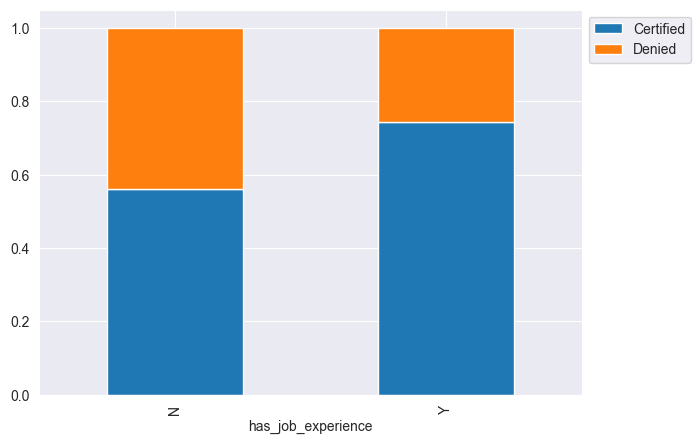

In [129]:
distribution_of_target(data=df_copy, predictor='has_job_experience', target='case_status')
stacked_barplot(data=df_copy, predictor='has_job_experience', target='case_status')

#### Observations
- People with existing job experience are more likely to be certified

#### Is the prevailing wage consistent across all regions of the US?

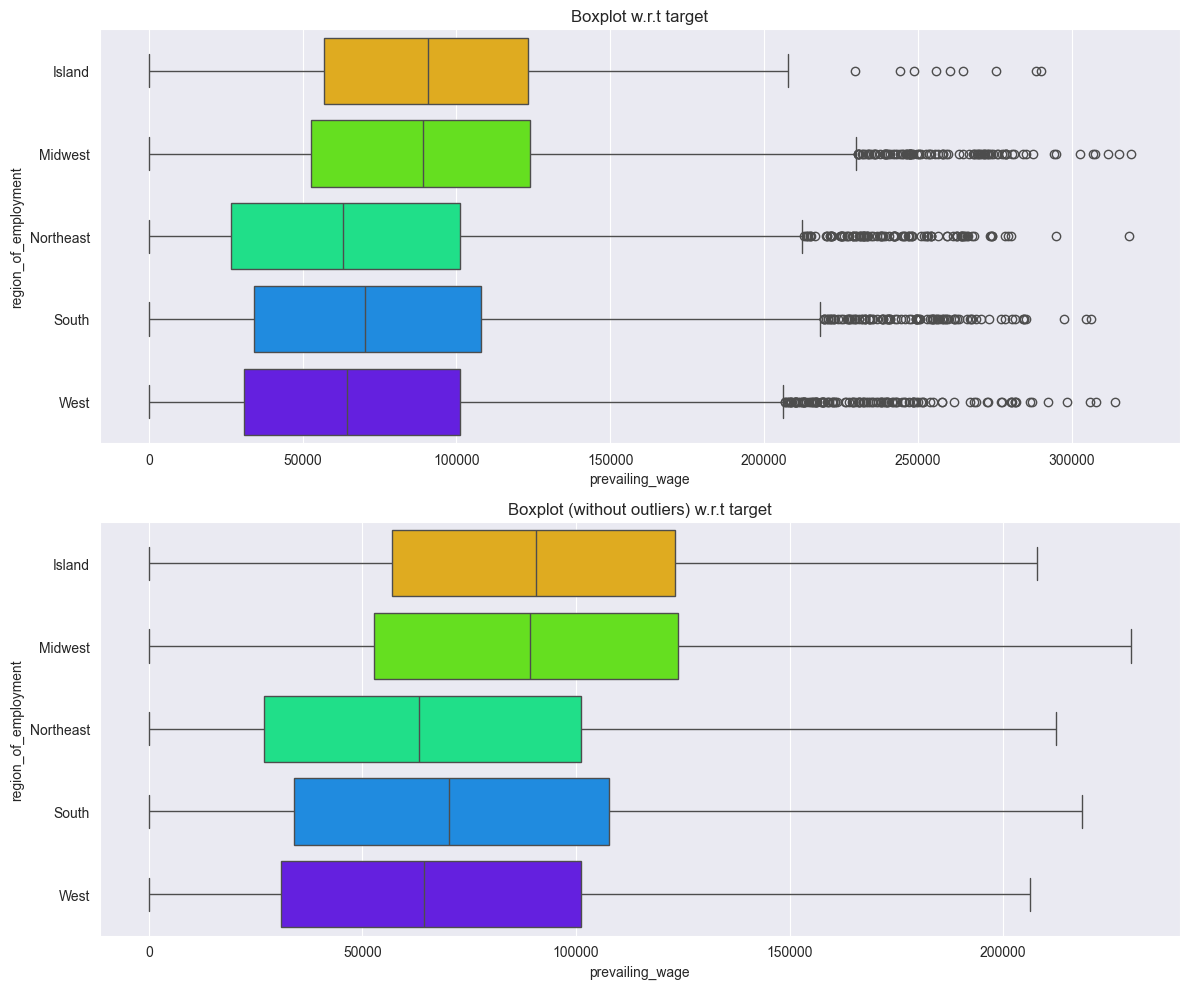

In [130]:
wrt_target(data=df_clean, predictor='region_of_employment', target='prevailing_wage')

#### Observations
- The regions with the highest wages are Island, and Midwest
- The for the island wages has less outliers than the other regions.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

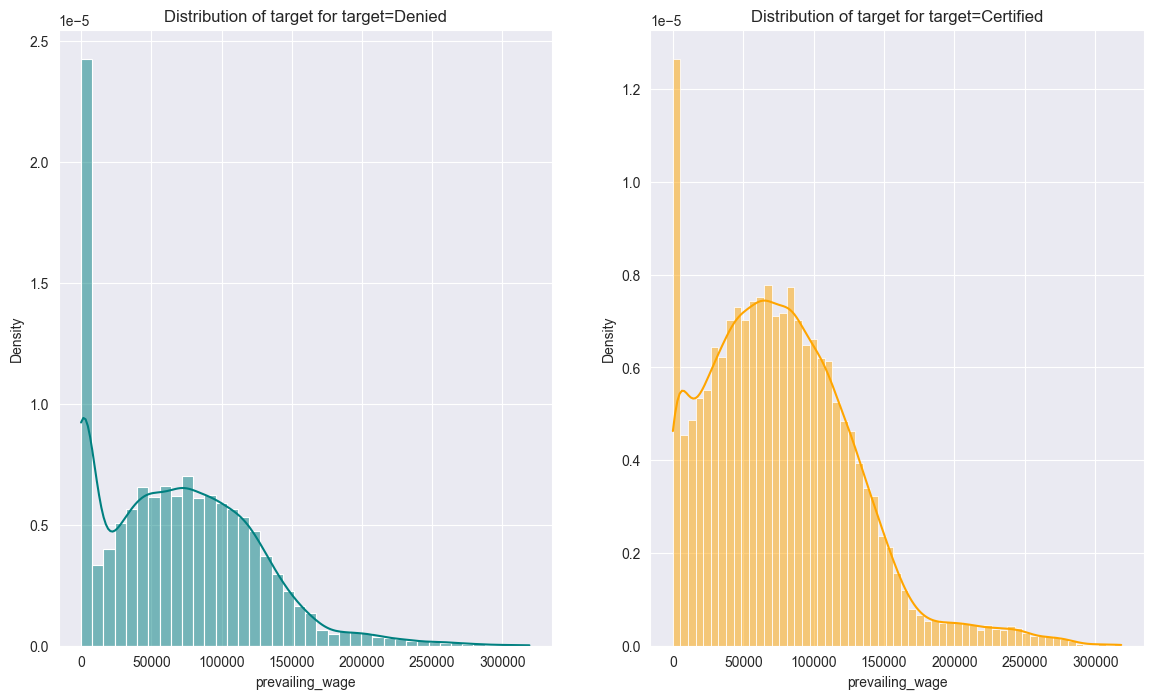

In [131]:
# Don't re-run this chart it takes too long
distribution_of_target(data=df_copy, predictor='prevailing_wage', target='case_status')

#### Observations
- Cases with higher prevailing_wage are more likely to be certified

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

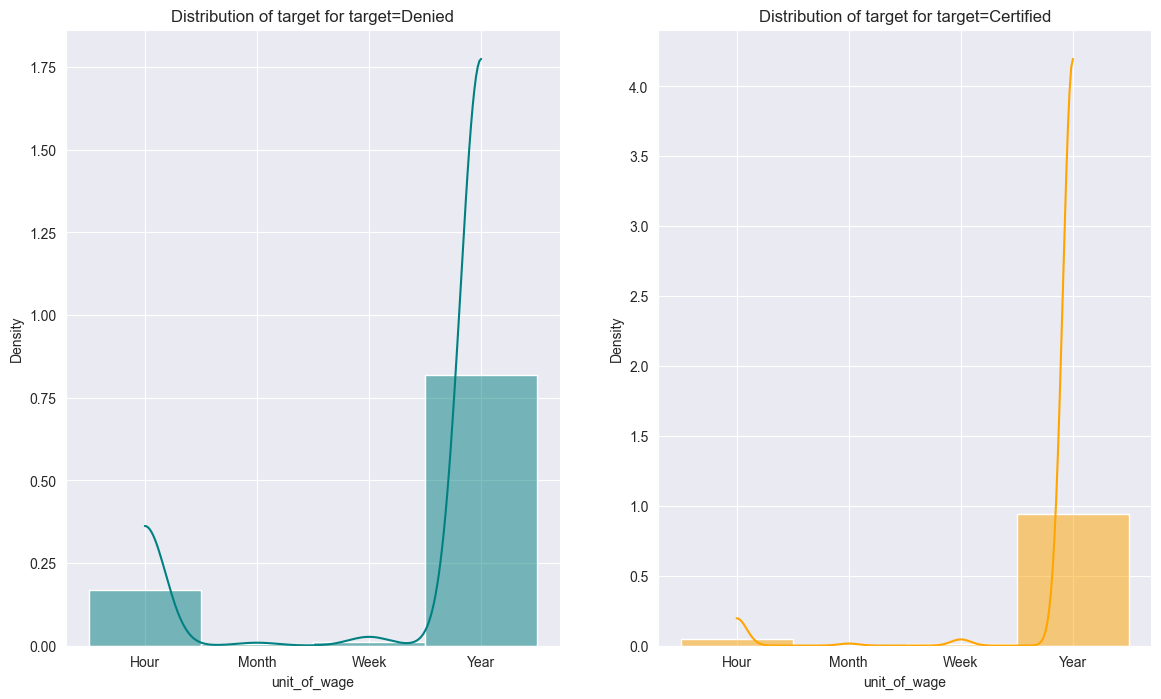

In [132]:
distribution_of_target(data=df_clean, predictor='unit_of_wage', target='case_status')


#### Observations
- Most of the approved cases have year selected for unit_of_wage.
- There are not a lot of applicants that select Month or Week as unit_of_wage.

## Data Pre-processing

### Outlier Check

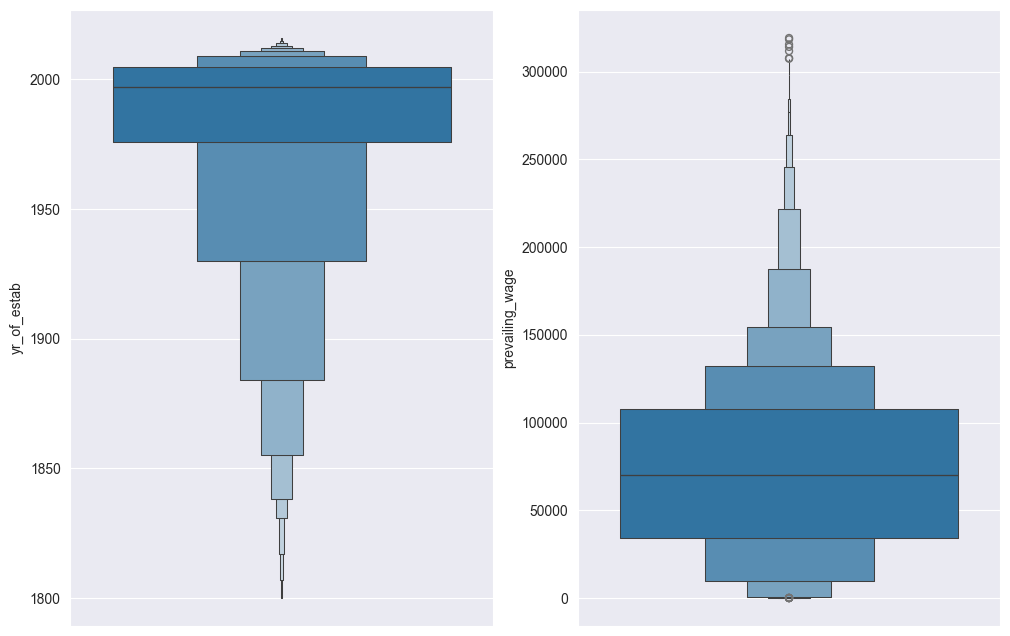

In [133]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.boxenplot(data=df_clean, y='yr_of_estab')
plt.subplot(1, 2, 2)
sns.boxenplot(data=df_clean, y='prevailing_wage')
plt.show()

#### Observation
- The yr_of_estab and prevailing_wage field both have a lot of outliers, but the distribution matches expectations so we aren't removing them.

### Data Preparation for modeling

<Axes: >

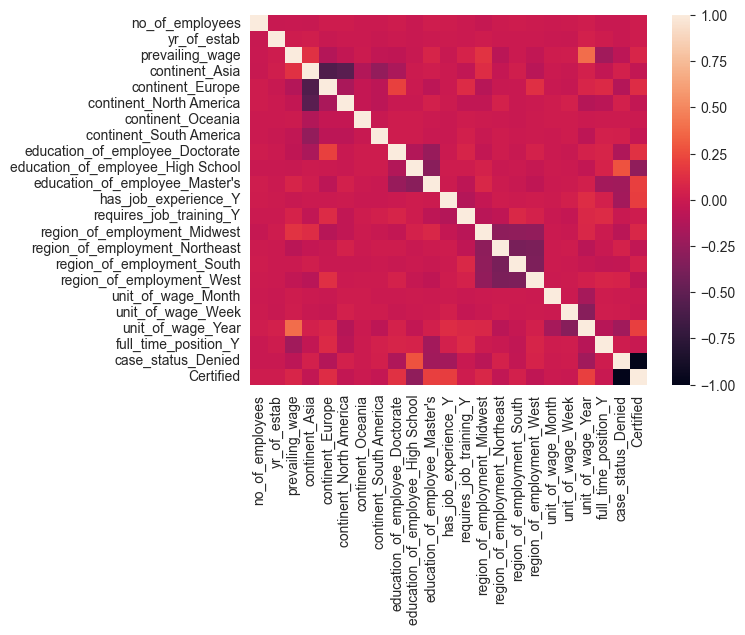

In [134]:
df_y_dummies = pd.get_dummies(df_original['case_status'])
df_clean.drop(columns=['case_id'], inplace=True, errors='ignore')

df_dummies = pd.get_dummies(data=df_clean, drop_first=True)
df_dummies['Certified'] = df_y_dummies['Certified']
sns.heatmap(df_dummies.corr())


#### Observations
- There is a strong correlation between prevailing wage and unit of wage. This could potentially cause some applicants that should be certified not to be if calculations on eligibility were based on annual income rather than hourly.

# Model Building


### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [135]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# defining a function to compute different metrics to check the performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [136]:


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

#### Defining scorer to be used for cross-validation and hyperparameter tuning
- I am using the f1 score as my performance metric because I believe both recall and precision is important in this use case.

In [137]:
def model_performance_f1_df(models, x_train, y_train, x_test, y_test):

    df_scores = pd.DataFrame(columns=['Name','Training', 'Testing', 'Delta'])
    for name, model in models:
        # It's best to fit once before this block
        model.fit(x_train, y_train.values.ravel())
        scores_train = f1_score(y_train, model.predict(x_train))
        scores_test = f1_score(y_test, model.predict(x_test))
        difference = np.abs(scores_train - scores_test)

        print(f"Model: {name} ~ Train: {scores_train * 100:.2f}% ~ Test: {scores_test * 100:.2f}% ~ Delta: {difference * 100:.2f}%")
        df_scores.loc[len(df_scores)] = [name, scores_train.round(4), scores_test.round(4), difference.round(4)]

    df_scores.sort_values(by=['Delta'], ascending=True, inplace=True)
    df_scores.reset_index(drop=True, inplace=True)

    return df_scores

def get_model_with_name(models, param_name):
    for name, model in models:
        if name == param_name:
            return model
    return None

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

## Model building with Original data


Training and Validation Performance Difference:

Model: Bagging ~ Train: 98.78% ~ Test: 77.74% ~ Delta: 21.04%
Model: Random forest ~ Train: 100.00% ~ Test: 79.69% ~ Delta: 20.31%
Model: Gradiant Boost ~ Train: 82.79% ~ Test: 81.88% ~ Delta: 0.91%
Model: Adaboost ~ Train: 81.89% ~ Test: 81.47% ~ Delta: 0.42%
Model: Decision Tree ~ Train: 100.00% ~ Test: 73.99% ~ Delta: 26.01%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Adaboost: 81.47%


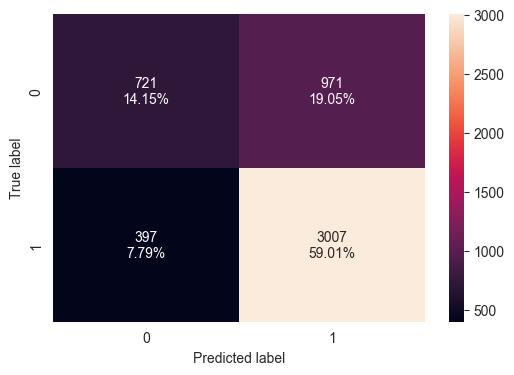

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split

df_y_dummies.drop("Denied", axis=1, inplace=True, errors='ignore')
df_dummies.drop(columns='Certified', inplace=True, errors='ignore')
df_dummies.drop(columns='case_status_Denied', inplace=True, errors='ignore')
x_train, x_test, y_train, y_test = train_test_split(df_dummies, df_y_dummies, test_size=0.2, random_state=RANDOM_STATE,  stratify=df_y_dummies['Certified'])

over_sampled_models2 = [
    ("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'), random_state=RANDOM_STATE)),
    ("Random forest", RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')),
    ("Gradiant Boost", GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ("Adaboost", AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)),
    ("Decision Tree", DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'))
]

print("\nTraining and Validation Performance Difference:\n")
df_scores = model_performance_f1_df(over_sampled_models2, x_train, y_train, x_test, y_test)
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{df_scores.loc[0].Name}: {df_scores.loc[0].Testing * 100:.2f}%")
df_scores.head()
best_model = get_model_with_name(over_sampled_models2, df_scores.loc[0].Name)
best_original_model = best_model
confusion_matrix_sklearn(best_model, x_test, y_test)

#### Original Data Observations
- The best model with the unmodified data was the Adaboost model with a testing score of 81.47%
- Random forest, and Decision Tree both create over fit models with training scores of 100%

In [139]:
# Saving the best model to variable for future use
best_model_name = df_scores.loc[0].Name + " Original"
best_model_score = df_scores.loc[0].Testing * 100
best_model_delta = df_scores.loc[0].Delta * 100
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{best_model_name} ~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
df_best_models_stats = pd.DataFrame(columns=['Name', 'Score', 'Delta'])
# Input data for best models
best_models = []

loc_index=0
best_models.append((best_model_name, best_model, best_model_score, best_model_delta))
df_best_models_stats.loc[loc_index] = [best_model_name, best_model_score, best_model_delta]

print(best_models)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Adaboost Original ~ Score: 81.47% ~ Delta: 0.42%
[('Adaboost Original', AdaBoostClassifier(algorithm='SAMME', random_state=42), np.float64(81.47), np.float64(0.42))]


## Model Building with Oversampled data


Validation Performance:

Model: Bagging ~ Train: 98.62% ~ Test: 75.78% ~ Delta: 22.83%
Model: Random forest ~ Train: 100.00% ~ Test: 79.31% ~ Delta: 20.69%
Model: Gradiant Boost ~ Train: 80.75% ~ Test: 80.85% ~ Delta: 0.10%
Model: Adaboost ~ Train: 79.64% ~ Test: 80.93% ~ Delta: 1.28%
Model: Decision Tree ~ Train: 100.00% ~ Test: 73.92% ~ Delta: 26.08%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Gradiant Boost: 80.85%


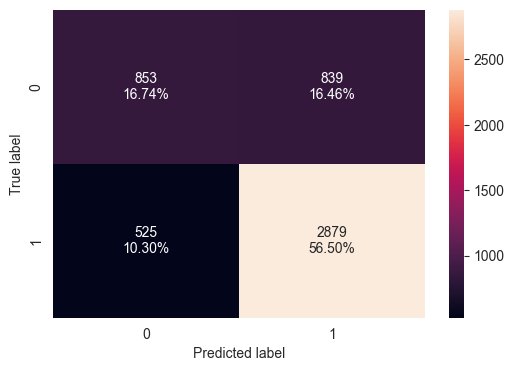

,Name,Training,Testing,Delta
0,Gradiant Boost,0.8075,0.8085,0.0010
1,Adaboost,0.7964,0.8093,0.0128
2,Random forest,1.0000,0.7931,0.2069
3,Bagging,0.9862,0.7578,0.2283
4,Decision Tree,1.0000,0.7392,0.2608


In [140]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
### Model Building - Oversampled Data

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

y_certified = y_train_over.values.sum()
y_total = y_train_over.size
y_denied = y_total - y_certified

over_sampled_models = []  # Empty list to store all the models


    # ("Adaboost", AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)),
# Appending models into the list
over_sampled_models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'), random_state=RANDOM_STATE)), )
over_sampled_models.append(("Random forest", RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')))
over_sampled_models.append(("Gradiant Boost", GradientBoostingClassifier(random_state=RANDOM_STATE)))
over_sampled_models.append(("Adaboost", AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME')))
over_sampled_models.append(("Decision Tree", DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')))


print("\n" "Validation Performance:" "\n")
df_over_scores = model_performance_f1_df(over_sampled_models, x_train_over, y_train_over, x_test, y_test)
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{df_over_scores.loc[0].Name}: {df_over_scores.loc[0].Testing * 100:.2f}%")

best_over_model = get_model_with_name(over_sampled_models, df_over_scores.loc[0].Name)
confusion_matrix_sklearn(best_over_model, x_test, y_test)
df_over_scores.head()

#### Over Sampled Observations
- The best Over Sampled model was the Gradiant Boost model
- The best over sampled model had a slightly lower score than the best previous model but a lower delta

In [141]:
# Saving the best model to variable for future use
loc_index=1
best_over_model_name = df_over_scores.loc[0].Name + " Over Sampled"
best_over_model_score = df_over_scores.loc[0].Testing * 100
best_over_model_delta = df_over_scores.loc[0].Delta * 100
best_models.append((best_over_model_name, best_over_model, best_over_model_score, best_over_model_delta))
df_best_models_stats.loc[loc_index] = [best_over_model_name, best_over_model_score, best_over_model_delta]
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nPrevious Best Model: {best_model_name}~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Over Sampled Model: {best_over_model_name} ~ Score: {best_over_model_score:.2f}% ~ Delta: {best_over_model_delta:.2f}%")
if best_over_model_delta < best_model_delta:
    best_model_score = best_over_model_score
    best_model_delta = best_over_model_delta
    best_model = get_model_with_name(over_sampled_models2, df_over_scores.loc[0].Name)
    best_model_name = df_scores.loc[0].Name + " Over Sampled"

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model Overall: {best_model_name} ~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Previous Best Model: Adaboost Original~ Score: 81.47% ~ Delta: 0.42%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Over Sampled Model: Gradiant Boost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model Overall: Adaboost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%


#### Observations
- The best over sampled model used the Gradiant Boost algorithm.
- The best over sampled model had a slightly lower test performance than the previous best model but had a lower delta.



## Model Building with Undersampled data


Validation Performance:

Model: Bagging ~ Train: 98.00% ~ Test: 69.34% ~ Delta: 28.66%
Model: Random forest ~ Train: 100.00% ~ Test: 73.33% ~ Delta: 26.67%
Model: Gradiant Boost ~ Train: 72.50% ~ Test: 76.25% ~ Delta: 3.74%
Model: Adaboost ~ Train: 71.02% ~ Test: 75.77% ~ Delta: 4.75%
Model: Decision Tree ~ Train: 100.00% ~ Test: 67.84% ~ Delta: 32.16%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Gradiant Boost: 76.25%


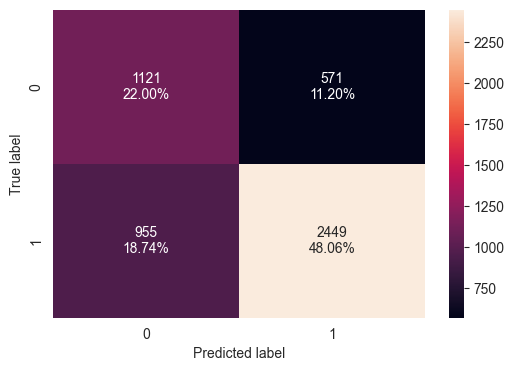

,Name,Training,Testing,Delta
0,Gradiant Boost,0.7250,0.7625,0.0374
1,Adaboost,0.7102,0.7577,0.0475
2,Random forest,1.0000,0.7333,0.2667
3,Bagging,0.9800,0.6934,0.2866
4,Decision Tree,1.0000,0.6784,0.3216


In [142]:
rus = RandomUnderSampler(random_state=RANDOM_STATE)
x_train_under, y_train_under = rus.fit_resample(x_train, y_train)

under_sampled_models = []  # Empty list to store all the models

# Appending models into the list
under_sampled_models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'), random_state=1)))
under_sampled_models.append(("Random forest", RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced')))
under_sampled_models.append(("Gradiant Boost", GradientBoostingClassifier(random_state=RANDOM_STATE)))
under_sampled_models.append(("Adaboost", AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME')))
under_sampled_models.append(("Decision Tree", DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced')))

print("\n" "Validation Performance:" "\n")
df_under_sampled_scores = model_performance_f1_df(under_sampled_models, x_train_under, y_train_under, x_test, y_test)
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{df_under_sampled_scores.loc[0].Name}: {df_under_sampled_scores.loc[0].Testing * 100:.2f}%")

best_under_sampled_model_name = df_under_sampled_scores.loc[0].Name
best_under_sampled_model_score = df_under_sampled_scores.loc[0].Testing * 100
best_under_sampled_model_delta = df_under_sampled_scores.loc[0].Delta * 100
best_under_sampled_model = get_model_with_name(under_sampled_models, df_over_scores.loc[0].Name)
confusion_matrix_sklearn(best_under_sampled_model, x_test, y_test)
df_under_sampled_scores.head()

#### Under Sampled Observations
- The best under sampled model was the Gradiant Boost model with a score of 76.25% and a delta of 3.74
- This model performed worse than the best previous models, so we won't be using it.

In [143]:
# Saving the best model to variable for future use
loc_index=2
best_under_model_name = df_under_sampled_scores.loc[0].Name + " Under Sampled"
best_under_model_score = df_under_sampled_scores.loc[0].Testing * 100
best_under_model_delta = df_under_sampled_scores.loc[0].Delta * 100
best_under_model = get_model_with_name(under_sampled_models, df_under_sampled_scores.loc[0].Name)
best_models.append((best_under_model_name, best_under_model, best_under_model_delta, best_under_model_delta))

df_best_models_stats.loc[loc_index] = [best_under_model_name, best_under_model_score, best_under_model_delta]
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nPrevious Best Model: {best_model_name}~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Under Sampled Model: {best_over_model_name} ~ Score: {best_over_model_score:.2f}% ~ Delta: {best_over_model_delta:.2f}%")
if best_under_sampled_model_delta < best_model_delta:
    best_model_score = best_under_sampled_model_score
    best_model_delta = best_under_sampled_model_delta
    best_model = get_model_with_name(under_sampled_models, df_under_sampled_scores.loc[0].Name)
    best_model_name = df_under_sampled_scores.loc[0].Name + " Under Sampled"

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model Overall: {best_model_name} ~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Previous Best Model: Adaboost Over Sampled~ Score: 80.85% ~ Delta: 0.10%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Under Sampled Model: Gradiant Boost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model Overall: Adaboost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%


In [144]:
df_best_models_stats.sort_values('Delta', ascending=True, inplace=True)
df_best_models_stats.head()

,Name,Score,Delta
1,Gradiant Boost Over Sampled,80.85,0.10
0,Adaboost Original,81.47,0.42
2,Gradiant Boost Under Sampled,76.25,3.74


#### Conclusion
- Out of the previous models tested, the Gradiant Boost Model with over sampling performed best with a testing score of 80.85% and a delta of 10%
- The best performing models over all were Gradiant Boost and AdaBoost.
- Since the performance of the original model and the over sampled model were so close, there is a good chance we could improve performance with hyperparameter tuning.

## Hyperparameter Tuning Manual

- Adding hyper parameters to all models and redoing the original and over_sampled trial.
- My main goal here is to eliminate the models which were over fit.
- I am doing the first round of hyperparameter based on industry best practices.

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

#### Hyperparameter Tuning Over Sampled Data


Validation Performance:

Model: Bagging Manual Tuning ~ Train: 98.63% ~ Test: 76.69% ~ Delta: 21.95%
Model: Random Forest Manual Tuning ~ Train: 99.94% ~ Test: 79.84% ~ Delta: 20.10%
Model: Gradiant Boost Manual Tuning ~ Train: 77.74% ~ Test: 81.04% ~ Delta: 3.30%
Model: Adaboost Manual Tuning ~ Train: 75.37% ~ Test: 80.91% ~ Delta: 5.54%
Model: Decision Tree Manual Tuning ~ Train: 77.42% ~ Test: 79.24% ~ Delta: 1.82%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Decision Tree Manual Tuning: 79.24%


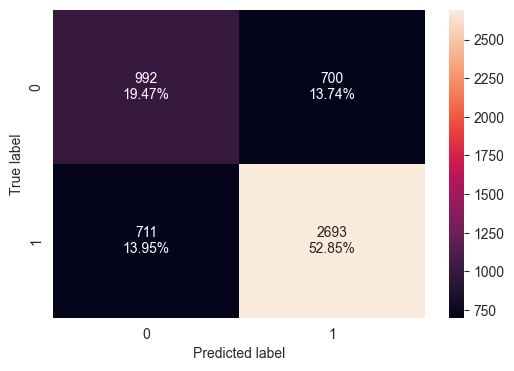

,Name,Training,Testing,Delta
0,Decision Tree Manual Tuning,0.7742,0.7924,0.0182
1,Gradiant Boost Manual Tuning,0.7774,0.8104,0.0330
2,Adaboost Manual Tuning,0.7537,0.8091,0.0554
3,Random Forest Manual Tuning,0.9994,0.7984,0.2010
4,Bagging Manual Tuning,0.9863,0.7669,0.2195


In [145]:
from imblearn.under_sampling import RandomUnderSampler
### Model Building - Oversampled Data
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=RANDOM_STATE
)  # Synthetic Minority Over Sampling Technique
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

y_certified = y_train_over.values.sum()
y_total = y_train_over.size
y_denied = y_total - y_certified

over_sampled_models2 = []  # Empty list to store all the models

# ("Adaboost", AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)),
# Appending models into the list
over_sampled_models2.append(("Bagging Manual Tuning",
                             BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'), random_state=RANDOM_STATE)))
over_sampled_models2.append(("Random Forest Manual Tuning",
                             RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_estimators=150, min_samples_split=3)))
over_sampled_models2.append(("Gradiant Boost Manual Tuning",
                             GradientBoostingClassifier(random_state=RANDOM_STATE, learning_rate=0.01, n_estimators=150, subsample=0.5)))
over_sampled_models2.append(("Adaboost Manual Tuning",
                             AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME', n_estimators=150, learning_rate=.1)))
over_sampled_models2.append(("Decision Tree Manual Tuning",
                             DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced', max_leaf_nodes=20)))


print("\n" "Validation Performance:" "\n")
df_over_scores2 = model_performance_f1_df(over_sampled_models2, x_train_over, y_train_over, x_test, y_test)
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{df_over_scores2.loc[0].Name}: {df_over_scores2.loc[0].Testing * 100:.2f}%")

best_over_model2 = get_model_with_name(over_sampled_models2, df_over_scores2.loc[0].Name)
confusion_matrix_sklearn(best_over_model2, x_test, y_test)
df_over_scores2.head()


#### Hyperparameter Tuning Original Data

In [146]:
# Saving the best model to variable for future use
loc_index=3
best_over_model_name = df_over_scores2.loc[0].Name + " Over Sampled"
best_over_model_score = df_over_scores2.loc[0].Testing * 100
best_over_model_delta = df_over_scores2.loc[0].Delta * 100
best_models.append((best_over_model_name, best_over_model, best_over_model_score, best_over_model_delta))
df_best_models_stats.loc[loc_index] = [best_over_model_name, best_over_model_score, best_over_model_delta]
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nPrevious Best Model: {best_model_name}~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Over Sampled Model: {best_over_model_name} ~ Score: {best_over_model_score:.2f}% ~ Delta: {best_over_model_delta:.2f}%")
if best_over_model_delta < best_model_delta:
    best_model_score = best_over_model_score
    best_model_delta = best_over_model_delta

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model Overall: {best_model_name} ~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
df_best_models_stats.head()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Previous Best Model: Adaboost Over Sampled~ Score: 80.85% ~ Delta: 0.10%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Over Sampled Model: Decision Tree Manual Tuning Over Sampled ~ Score: 79.24% ~ Delta: 1.82%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model Overall: Adaboost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%


,Name,Score,Delta
1,Gradiant Boost Over Sampled,80.85,0.10
0,Adaboost Original,81.47,0.42
2,Gradiant Boost Under Sampled,76.25,3.74
3,Decision Tree Manual Tuning Over Sampled,79.24,1.82


In [147]:
from imblearn.under_sampling import RandomUnderSampler
### Model Building - Oversampled Data
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique

tuned_models2 = []  # Empty list to store all the models

# ("Adaboost", AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)),
# Appending models into the list
tuned_models2.append(("Bagging Manual Tuning", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'), random_state=RANDOM_STATE)), )
tuned_models2.append(("Random Forest Manual Tuning", RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced', n_estimators=150, min_samples_split=3)))
tuned_models2.append(("Gradiant Boost Manual Tuning", GradientBoostingClassifier(random_state=RANDOM_STATE, learning_rate=0.01, n_estimators=150, subsample=0.5)))
tuned_models2.append(("Adaboost Manual Tuning", AdaBoostClassifier(random_state=RANDOM_STATE, algorithm='SAMME', n_estimators=150, learning_rate=.1)))
tuned_models2.append(("Decision Tree Manual Tuning", DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced', max_leaf_nodes=20)))


print("\n" "Validation Performance:" "\n")
df_tuned_model2_scores = model_performance_f1_df(tuned_models2, x_train, y_train, x_test, y_test)
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model-{df_tuned_model2_scores.loc[0].Name}: {df_tuned_model2_scores.loc[0].Testing * 100:.2f}%")

best_tuned_model2 = get_model_with_name(tuned_models2, df_tuned_model2_scores.loc[0].Name)
df_tuned_model2_scores.head()



Validation Performance:

Model: Bagging Manual Tuning ~ Train: 98.78% ~ Test: 77.74% ~ Delta: 21.04%
Model: Random Forest Manual Tuning ~ Train: 99.94% ~ Test: 80.15% ~ Delta: 19.79%
Model: Gradiant Boost Manual Tuning ~ Train: 82.37% ~ Test: 81.89% ~ Delta: 0.48%
Model: Adaboost Manual Tuning ~ Train: 81.55% ~ Test: 81.22% ~ Delta: 0.33%
Model: Decision Tree Manual Tuning ~ Train: 77.76% ~ Test: 76.60% ~ Delta: 1.16%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model-Adaboost Manual Tuning: 81.22%


,Name,Training,Testing,Delta
0,Adaboost Manual Tuning,0.8155,0.8122,0.0033
1,Gradiant Boost Manual Tuning,0.8237,0.8189,0.0048
2,Decision Tree Manual Tuning,0.7776,0.7660,0.0116
3,Random Forest Manual Tuning,0.9994,0.8015,0.1979
4,Bagging Manual Tuning,0.9878,0.7774,0.2104


In [148]:
# Saving the best model to variable for future use
loc_index = 4
best_tuned_model2_name = df_tuned_model2_scores.loc[0].Name + " Original Data"
best_tuned_model2_score = df_tuned_model2_scores.loc[0].Testing * 100
best_tuned_model2_delta = df_tuned_model2_scores.loc[0].Delta * 100
best_models.append((best_tuned_model2_name, best_tuned_model2, best_tuned_model2_score, best_tuned_model2_delta))
df_best_models_stats.loc[loc_index] = [best_tuned_model2_name, best_tuned_model2_score, best_tuned_model2_delta]
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nPrevious Best Model: {best_model_name}~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Tuned Model with Original Data: {best_tuned_model2_name} ~ Score: {best_tuned_model2_score:.2f}% ~ Delta: {best_tuned_model2_delta:.2f}%")
if best_tuned_model2_delta < best_model_delta:
    best_model_score = best_tuned_model2_score
    best_model_delta = best_tuned_model2_delta

print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~"
      f"\nBest Model Overall: {best_model_name} ~ Score: {best_model_score:.2f}% ~ Delta: {best_model_delta:.2f}%")
df_best_models_stats.head()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Previous Best Model: Adaboost Over Sampled~ Score: 80.85% ~ Delta: 0.10%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Tuned Model with Original Data: Adaboost Manual Tuning Original Data ~ Score: 81.22% ~ Delta: 0.33%
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best Model Overall: Adaboost Over Sampled ~ Score: 80.85% ~ Delta: 0.10%


,Name,Score,Delta
1,Gradiant Boost Over Sampled,80.85,0.10
0,Adaboost Original,81.47,0.42
2,Gradiant Boost Under Sampled,76.25,3.74
3,Decision Tree Manual Tuning Over Sampled,79.24,1.82
4,Adaboost Manual Tuning Original Data,81.22,0.33


#### Observations
- I wasn't able to get beter metrics with hyper parameter tuning for either the over sampled data or the original data.
- The performance of the Decision Tree and Random Forest models improved a lot after tuning but their performance was still worse than my previous best models.

## Hyper Parameter Tuning Grid Search.
I am going to do a second round of hyperparameter tuning Gradiant Boost Over Sampled model since it performed the best so far.

#### Gradiant Boost Over Sampled Tuning

In [ ]:
####  Code takes several minutes to run
learning_rate_params = [.4,  .5, .6, .7]
n_estimators_params = [25, 30, 35]
subsample_params = [.2, .3, .4]
gradiant_boost_models = []
for learning_rate in learning_rate_params:
    for n_estimators in n_estimators_params:
        for subsample in subsample_params:
            model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample)
            model.fit(x_train_over, y_train_over.values.ravel())
            gradiant_boost_models.append((f"Gradiant Boost Over Sampled: learning_rate: {learning_rate}, n_estimators: {n_estimators}, subsample: {subsample}", model))

gradiant_boost_tuned_scores = model_performance_f1_df(gradiant_boost_models, x_train_over, y_train_over, x_test, y_test)



GradientBoostingClassifier(learning_rate=0.7, n_estimators=30, subsample=0.2)


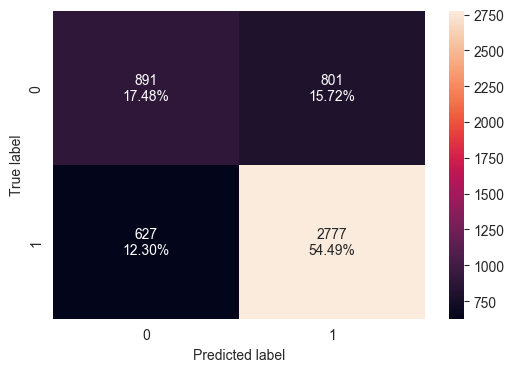

,Name,Score,Delta
4,Gradiant Boost Over Sampled: learning_rate: 0....,79.55,0.00
1,Gradiant Boost Over Sampled,80.85,0.10
0,Adaboost Original,81.47,0.42
3,Decision Tree Manual Tuning Over Sampled,79.24,1.82
2,Gradiant Boost Under Sampled,76.25,3.74


In [100]:
gradiant_boost_over_tuned_scores = gradiant_boost_tuned_scores
gradiant_boost_over_tuned_model = get_model_with_name(gradiant_boost_models, gradiant_boost_tuned_scores.loc[0].Name)
gradiant_boost_over_model = get_model_with_name(gradiant_boost_models, gradiant_boost_tuned_scores.loc[0].Name)
print(gradiant_boost_over_model)
confusion_matrix_sklearn(gradiant_boost_over_model, x_test, y_test)
df_best_models_stats.head()
model_index = 5
sr_new_row = gradiant_boost_tuned_scores.loc[0]
df_best_models_stats.loc[loc_index] = [sr_new_row.Name, sr_new_row.Testing * 100, sr_new_row.Delta * 100]
df_best_models_stats.head()
best_model = gradiant_boost_over_tuned_model
df_best_models_stats.sort_values('Delta', ascending=True, inplace=True)
df_best_models_stats.head()

#### Observations
- Gradiant Search improved the stability of the model but didn't improve over all accuracy.
- The best hyperparameters were a learning_rate of 0.5, n_estimators= 30, subsample=.03
- At this point further hyper parameter tuning is unlikely to yeald any additional performance benifits.

# Model Performance Summary and Final Model Selection
- The best model was the Gradiant Boost Over Sampled Model with the following hyperparameters
- "learning_rate: 0.7, n_estimators: 25, subsample: 0.2" It has an f1 score of 80.05% and a delta of .01%
- I am oconfident this model is stable enout to deploy into production.


## Actionable Insights and Recommendations

- The best performing model was the Over sampled Gradiant Boost model with hyper parameter tuning.
- This model had an F1 score of 80.05% and a Delta score of .01%

# Conclusion

In this project, I performed exploratory data analysis and built several machine learning models to predict visa application status from the initial dataset.

## Model Validation:
The project began with EDA on the raw data, where I handled missing values and converted categorical features into numerical form. The dataset was then split into training and testing subsets for model evaluation.

## Model Building:
Model development was completed in three stages.

1. Initial Models: I trained five different models on the original training data and saved the best-performing one for later analysis.
2. Over-Sampled Models: I applied oversampling to address class imbalance and retrained the same five models, again retaining the best results.
3. Under-Sampled Models: I repeated the process with under-sampled data and compared performance across all sections.

After evaluating all models, I identified which were overfit and which generalized well. The strongest performers were the Gradient Boosting model on the over-sampled data and the AdaBoost model on the original dataset.

## Model Tuning:
I conducted two rounds of hyperparameter tuning. In the first round, I adjusted parameters manually to reduce overfitting and achieve balanced performance across models. In the second round, I performed a formal grid search on the top-performing model to further optimize its accuracy and efficiency.

## Final Results:
The final top-performing models were:

- Gradient Boost (Over-Sampled)
- AdaBoost (Over-Sampled)
- Decision Tree (Over-Sampled, manually tuned)
- Gradient Boost (Under-Sampled)

A formal grid search was performed on the top model which was the Gradiant Boost Over-Sampled model.
The performance differences between the manually tuned model and the grid search was under 1% which I felt was a small enough margin that additional tuning was unessesary.

Overall, the Gradient Boosting model on over-sampled data provided the best balance between precision and recall, making it the most suitable model for predicting visa application outcomes.


## Future Improvements
- It would be possible to create an ensemble model using the top 5 existing models.

### Final Thoughts
- For future projects I will replace the model validation function from test train delta to k-fold cross validation.
- If I had stored all the models in a single dataframe from the beginning of the project it would have made future data processing much easier.

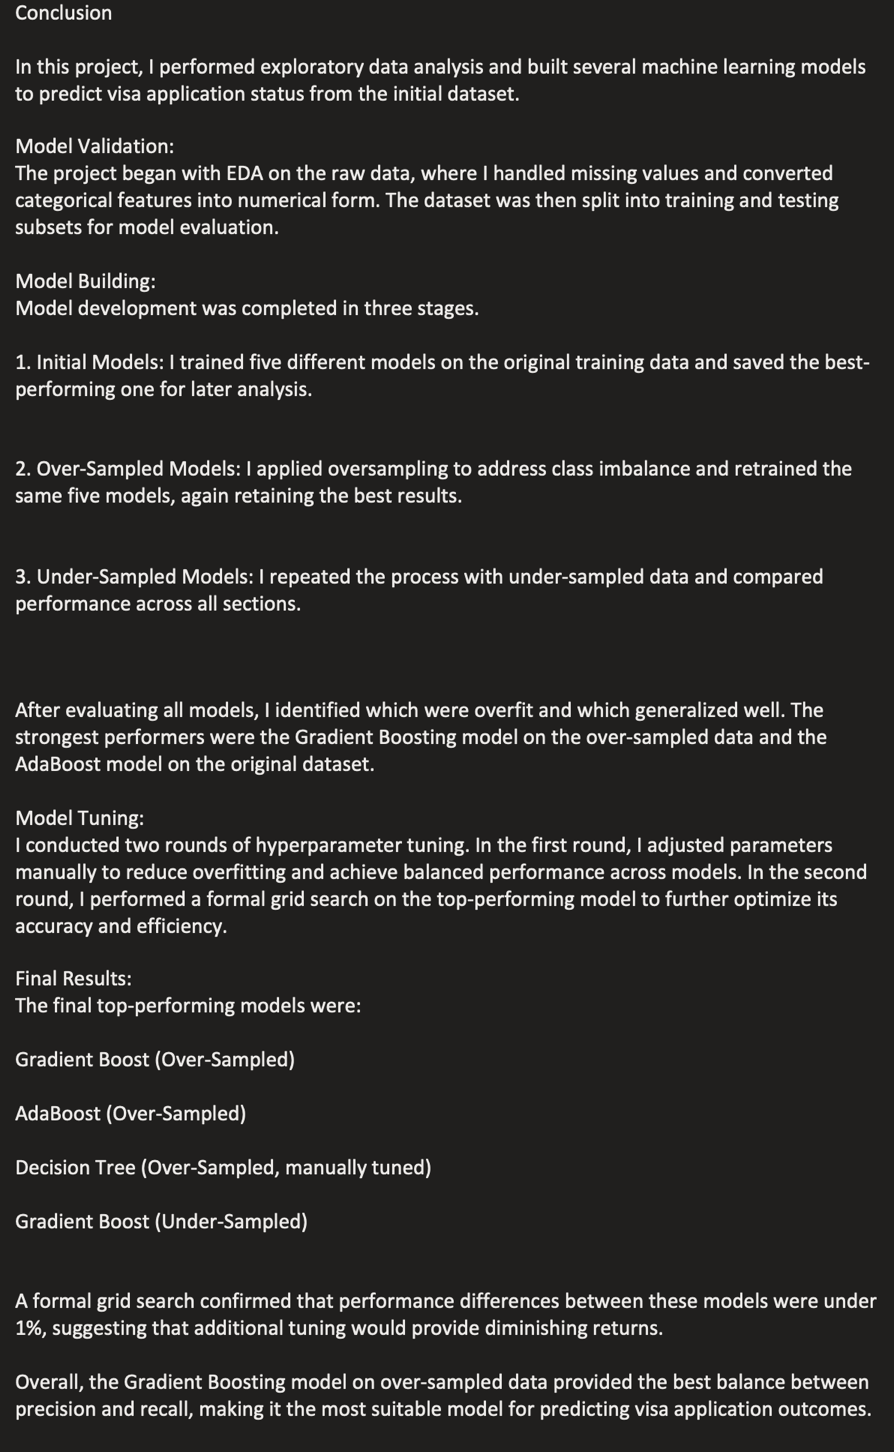

<font size=6 color='blue'>Power Ahead</font>
___